In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

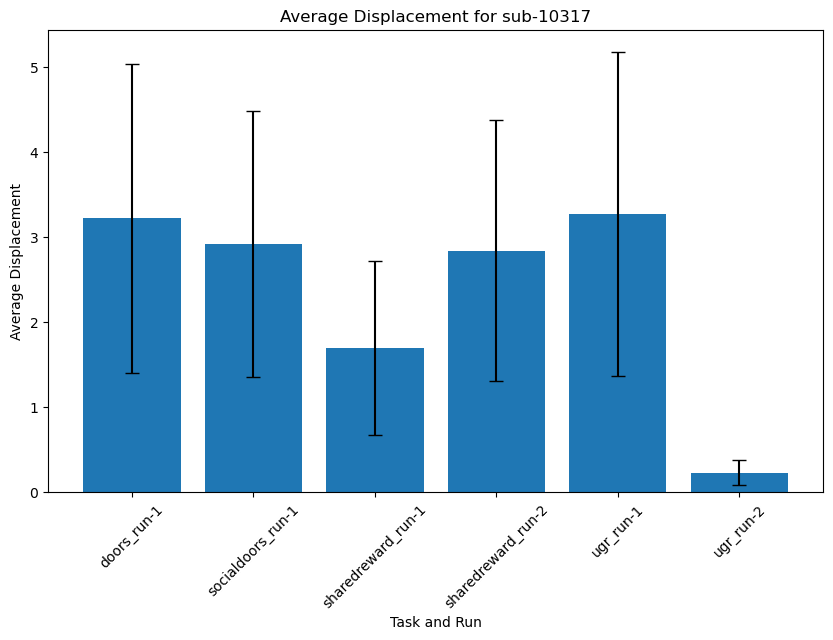

In [2]:
# Define the path to the data
base_path = '/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/'
subject = '10317'
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugr']
runs = ['1', '2']

# Exclude these runs; right now the script only works if you specify all of the missing runs here
exclude_runs = ['doors_run-2', 'socialdoors_run-2']

def read_tsv_files(sub):
    displacements = {}
    std_devs = {}
    for task in tasks:
        for run in runs:
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs:
                continue
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                    f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                #print(f"Loading file: {file_path}")
                data = pd.read_csv(file_path, sep='\t')
                #print(data.head())
                if 'displacement' in data.columns:
                    displacement = np.nanmean(data['displacement'])
                    std_dev = np.std(data['displacement'])
                    #print(f"Displacement for {task_run_key}: {displacement}")
                    displacements[task_run_key] = displacement
                    std_devs[task_run_key] = std_dev
                else:
                    print(f"'displacement' column not found in {file_path}")
                    displacements[task_run_key] = np.nan
                    std_devs[task_run_key] = np.nan
            else:
                print(f"File not found: {file_path}")
                displacements[task_run_key] = np.nan
                std_devs[task_run_key] = np.nan
    return displacements, std_devs

# Get displacement and standard deviations for the subject
subject_displacements, subject_std_devs = read_tsv_files(subject)
#print(subject_displacements)
#print(subject_std_devs)

# Filter out NaN values for plotting
filtered_displacements = {k: v for k, v in subject_displacements.items() if not np.isnan(v)}
filtered_std_devs = {k: subject_std_devs[k] for k in filtered_displacements.keys()}

# Plot the variances
keys = list(subject_displacements.keys())
values = [filtered_displacements[key] for key in keys]
errors = [filtered_std_devs[key] for key in keys]

plt.figure(figsize=(10, 6))
plt.bar(keys, values, yerr=errors, capsize=5)
plt.xlabel('Task and Run')
plt.ylabel('Average Displacement')
plt.title(f'Average Displacement for sub-{subject}')
plt.xticks(rotation=45)
plt.show()             

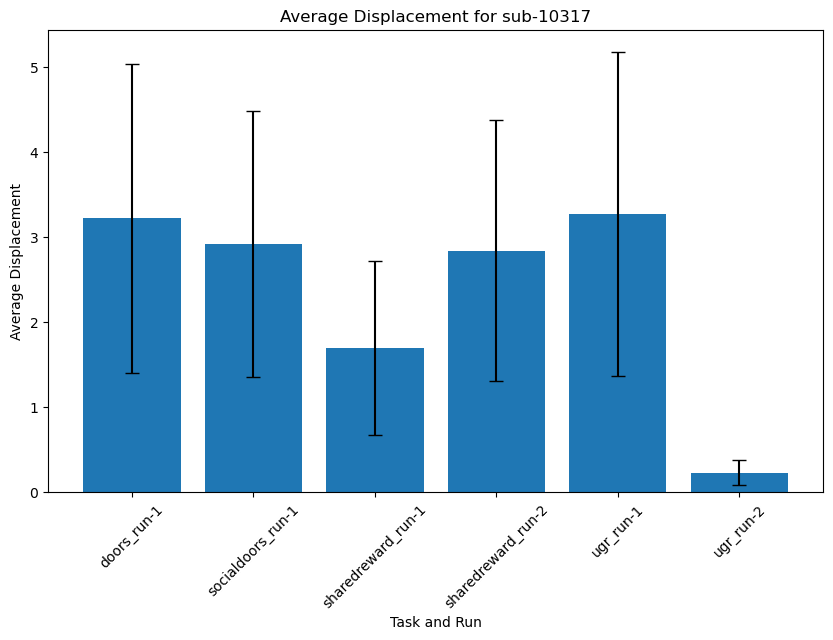

In [3]:
# Define the path to the data
base_path = '/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/'
subject = '10317'
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugr']
runs = ['1', '2']

# Exclude these runs; right now the script only works if you specify all of the missing runs here
exclude_runs = ['doors_run-2', 'socialdoors_run-2', 'mid_run-2']

def read_tsv_files(sub):
    averages = {}
    std_devs = {}
    for task in tasks:
        for run in runs:
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs:
                continue
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                    f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                #print(f"Loading file: {file_path}")
                data = pd.read_csv(file_path, sep='\t')
                #print(data.head())
                if 'displacement' in data.columns:
                    average = np.nanmean(data['displacement'])
                    std_dev = np.std(data['displacement'])
                    #print(f"Average for {task_run_key}: {average}")
                    averages[task_run_key] = average
                    std_devs[task_run_key] = std_dev
                else:
                    print(f"'displacement' column not found in {file_path}")
                    averages[task_run_key] = np.nan
                    std_devs[task_run_key] = np.nan
            else:
                print(f"File not found: {file_path}")
                averages[task_run_key] = np.nan
                std_devs[task_run_key] = np.nan
    return averages, std_devs

# Get variances and standard deviations for the subject
subject_averages, subject_std_devs = read_tsv_files(subject)
#print(subject_averages)
#print(subject_std_devs)

# Filter out NaN values for plotting
filtered_averages = {k: v for k, v in subject_averages.items() if not np.isnan(v)}
filtered_std_devs = {k: subject_std_devs[k] for k in filtered_averages.keys()}

# Plot the variances
keys = list(subject_averages.keys())
values = [filtered_averages[key] for key in keys]
errors = [filtered_std_devs[key] for key in keys]

plt.figure(figsize=(10, 6))
plt.bar(keys, values, yerr=errors, capsize=5)
plt.xlabel('Task and Run')
plt.ylabel('Average Displacement')
plt.title(f'Average Displacement for sub-{subject}')
plt.xticks(rotation=45)
plt.show()             

In [ ]:
# Define the path to the data 
base_path = '/ZPOOL/data/projects/rf1-sra-data/derivatives/mreye_echo-2/bidsmreye/'
sublist_path = '/ZPOOL/data/projects/rf1-sra-data/code/sublist_all.txt'
tasks = ['doors', 'socialdoors', 'sharedreward', 'ugdr'] 
runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    averages = {}
    for task in tasks: 
        task_averages = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'displacement' in data.columns:
                    average = np.nanmean(data['displacement'])
                    task_averages.append(average)
                else:
                    task_averages.append(np.nan)
            else:
                task_averages.append(np.nan)
        
        # Average variances if there are multiple runs
        if len(task_averages) > 1:
            task_averages = [v for v in task_averages if not np.isnan(v)]
            if task_averages:
                avg_average = np.mean(task_averages)
            else: avg_average = np.nan
        else:
            avg_average = task_averages[0] if task_averages else np.nan
        averages[task] = avg_average
    return averages 

def aggregate_averages(subjects):
    all_averages = {task: [] for task in tasks}
    for sub in subjects:
        subject_averages = read_tsv_files(sub)
        for task, average in subject_averages.items():
            all_averages[task].append(average)
    return all_averages 

# Get averages for all subjects 
all_subject_averages = aggregate_averages(subjects) 

# Calculate average average for each task across all subjects
average_averages = {task: np.nanmean(all_subject_averages[task]) for task in tasks}
std_devs = {task: np.nanstd(all_subject_averages[task]) for task in tasks}

# Plot the average averages 
keys = list(average_averages.keys()) 
values = [average_averages[key] for key in keys] 
errors = [std_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Displacement') 
plt.title('Average Displacement Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    std_devs = {}
    for task in tasks: 
        task_std_devs = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'eye1_x_coordinate' in data.columns:
                    std_dev = np.std(data['eye1_x_coordinate'])
                    task_std_devs.append(std_dev)
                else:
                    task_std_devs.append(np.nan)
            else:
                task_std_devs.append(np.nan)
        
        # Average std devs if there are multiple runs
        if len(task_std_devs) > 1:
            task_std_devs = [v for v in task_std_devs if not np.isnan(v)]
            if task_std_devs:
                avg_std_dev = np.mean(task_std_devs)
            else: avg_stf_dev = np.nan
        else:
            avg_std_dev = task_std_devs[0] if task_std_devs else np.nan
        std_devs[task] = avg_std_dev
    return std_devs 

def aggregate_std_devs(subjects):
    all_std_devs = {task: [] for task in tasks}
    for sub in subjects:
        subject_std_devs = read_tsv_files(sub)
        for task, std_dev in subject_std_devs.items():
            all_std_devs[task].append(std_dev)
    return all_std_devs 

# Get std dev for all subjects 
all_subject_std_devs = aggregate_std_devs(subjects) 

# Calculate average average for each task across all subjects
average_std_devs = {task: np.nanmean(all_subject_std_devs[task]) for task in tasks}
rstd_devs = {task: np.nanstd(all_subject_std_devs[task]) for task in tasks}

# Plot the average averages 
keys = list(average_std_devs.keys()) 
values = [average_std_devs[key] for key in keys] 
errors = [rstd_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Std Dev') 
plt.title('Average Std Dev X Coord Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    std_devs = {}
    for task in tasks: 
        task_std_devs = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'eye1_y_coordinate' in data.columns:
                    std_dev = np.std(data['eye1_y_coordinate'])
                    task_std_devs.append(std_dev)
                else:
                    task_std_devs.append(np.nan)
            else:
                task_std_devs.append(np.nan)
        
        # Average std devs if there are multiple runs
        if len(task_std_devs) > 1:
            task_std_devs = [v for v in task_std_devs if not np.isnan(v)]
            if task_std_devs:
                avg_std_dev = np.mean(task_std_devs)
            else: avg_stf_dev = np.nan
        else:
            avg_std_dev = task_std_devs[0] if task_std_devs else np.nan
        std_devs[task] = avg_std_dev
    return std_devs 

def aggregate_std_devs(subjects):
    all_std_devs = {task: [] for task in tasks}
    for sub in subjects:
        subject_std_devs = read_tsv_files(sub)
        for task, std_dev in subject_std_devs.items():
            all_std_devs[task].append(std_dev)
    return all_std_devs 

# Get std dev for all subjects 
all_subject_std_devs = aggregate_std_devs(subjects) 

# Calculate average average for each task across all subjects
average_std_devs = {task: np.nanmean(all_subject_std_devs[task]) for task in tasks}
rstd_devs = {task: np.nanstd(all_subject_std_devs[task]) for task in tasks}

# Plot the average averages 
keys = list(average_std_devs.keys()) 
values = [average_std_devs[key] for key in keys] 
errors = [rstd_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Std Dev') 
plt.title('Average Std Dev Y Coord Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()

In [ ]:
# Define the path to the data 
#base_path = '/ZPOOL/data/projects/istart-data/derivatives/mreye/bidsmreye/'
#sublist_path = '/ZPOOL/data/projects/istart-data/code/sublist_all.txt'
#tasks = ['doors', 'socialdoors', 'sharedreward', 'mid', 'ugdg'] 
#runs = ['1', '2'] 

# Exclude these runs 
exclude_runs = ['doors_run-2', 'socialdoors_run-2'] 

with open (sublist_path, 'r') as file:
    subjects = file.read().splitlines()

def read_tsv_files(sub): 
    variances = {}
    for task in tasks: 
        task_variances = []
        for run in runs: 
            task_run_key = f'{task}_run-{run}'
            if task_run_key in exclude_runs: 
                continue 
            file_path = os.path.join(base_path, f'sub-{sub}', 'func',
                                     f'sub-{sub}_task-{task}_run-{run}_space-MNI152NLin6Asym_desc-bidsmreye_eyetrack.tsv')
            if os.path.exists(file_path):
                data = pd.read_csv(file_path, sep='\t')
                if 'displacement' in data.columns:
                    variance = np.var(data['displacement'])
                    task_variances.append(variance)
                else:
                    task_variances.append(np.nan)
            else:
                task_variances.append(np.nan)
        
        # Average variances if there are multiple runs
        if len(task_variances) > 1:
            task_variances = [v for v in task_variances if not np.isnan(v)]
            if task_variances:
                avg_variance = np.mean(task_variances)
            else: avg_variance = np.nan
        else:
            avg_variance = task_variances[0] if task_variances else np.nan
        variances[task] = avg_variance
    return variances 

def aggregate_variances(subjects):
    all_variances = {task: [] for task in tasks}
    for sub in subjects:
        subject_variances = read_tsv_files(sub)
        for task, variance in subject_variances.items():
            all_variances[task].append(variance)
    return all_variances 

# Get variances for all subjects 
all_subject_variances = aggregate_variances(subjects) 

# Calculate average variance for each task across all subjects
average_variances = {task: np.nanmean(all_subject_variances[task]) for task in tasks}
std_devs = {task: np.nanstd(all_subject_variances[task]) for task in tasks}

# Plot the average variances 
keys = list(average_variances.keys()) 
values = [average_variances[key] for key in keys] 
errors = [std_devs[key] for key in keys]

plt.figure(figsize=(10, 6)) 
plt.bar(keys, values, yerr=errors, capsize=5) 
plt.xlabel('Task') 
plt.ylabel('Average Variance in Displacement') 
plt.title('Average Variance in Displacement Across All Subjects') 
plt.xticks(rotation=45) 
plt.show()